In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('uber.csv')

In [3]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
data.shape

(200000, 9)

**Data Preprocessing**

In [5]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
data.drop(columns='Unnamed: 0',inplace=True)

In [7]:
data=data.dropna()

In [8]:
data = data[data['fare_amount']> 0]
data["pickup_datetime"] = data["pickup_datetime"].apply(lambda x:[x[0:10] for x in x.split(' ')])
data['pickup_datetime'] = data['pickup_datetime'].apply(lambda x:x[0])
data['pickup_datetime'] = pd.DatetimeIndex(data['pickup_datetime']).year

In [9]:
data.drop(columns=['key','pickup_datetime'],inplace=True)

In [10]:
X = data.drop(['fare_amount'],axis=1)
y = data['fare_amount']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [11]:
data.corr() #correlation

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010468,-0.008489,0.009208,-0.011250,0.010422
pickup_longitude,0.010468,1.000000,-0.816434,0.833132,-0.846449,-0.000488
pickup_latitude,-0.008489,-0.816434,1.000000,-0.774880,0.702450,-0.001500
dropoff_longitude,0.009208,0.833132,-0.774880,1.000000,-0.916971,-0.000104
dropoff_latitude,-0.011250,-0.846449,0.702450,-0.916971,1.000000,-0.000514
passenger_count,0.010422,-0.000488,-0.001500,-0.000104,-0.000514,1.000000


**Outlier detection**

<Axes: >

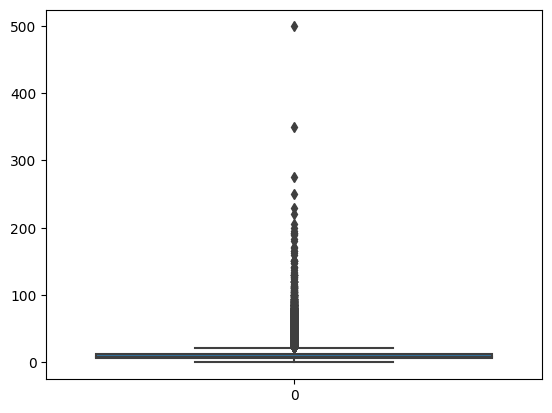

In [12]:
sns.boxplot(data['fare_amount'])

In [13]:
#removing the outlier
Q1 = np.percentile(data['fare_amount'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['fare_amount'],75, interpolation='midpoint')
print(Q1,Q3)

6.0 12.5


In [14]:
data.drop(data[data['fare_amount'].values>12.5].index, inplace=True)

<Axes: >

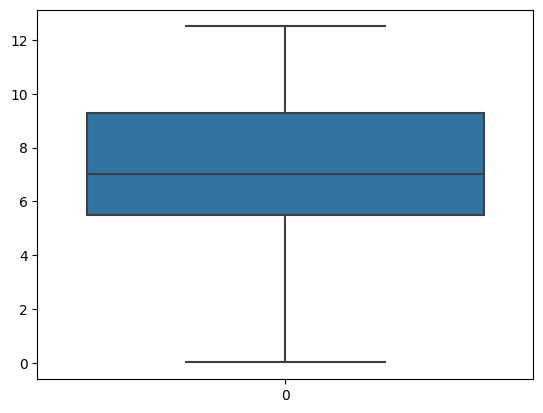

In [15]:
sns.boxplot(data['fare_amount'])

**Linear regression**

In [16]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
y_pred = linear_model.predict(x_test)

In [17]:
from math import sqrt

def evaluate_model(y_true, y_pred, model_name):
  rmse = sqrt(mean_squared_error(y_true,y_pred))
  r2 = r2_score(y_true,y_pred)
  print(f"{model_name} RMSE: {rmse:.2f}")
  print(f"{model_name} R-squared (R2): {r2:.2f}")

evaluate_model(y_test,y_pred,"Linear Regression")

Linear Regression RMSE: 9.82
Linear Regression R-squared (R2): 0.00


**Random forest**

In [18]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [19]:
def evaluate_model(y_true, y_pred, model_name):
  rmse = sqrt(mean_squared_error(y_true, y_pred))
  r2 = r2_score(y_true, y_pred)
  print(f"{model_name} RMSE: {rmse:.2f}")
  print(f"{model_name} R-squared (R2): {r2:.2f}")

evaluate_model(y_test,y_pred_rf,"Random Forest Regression")

Random Forest Regression RMSE: 4.93
Random Forest Regression R-squared (R2): 0.75
